# Statistical Analysis

#### We see that a few of the variables in our dataset are categorical variables. We want to see the relationships between those categorical 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [36]:
import numpy as np
import numpy.random as nr
from numpy.linalg import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
cd /Users/deepsha/downloads

/Users/deepsha/Downloads


In [6]:
df = pd.read_csv("Fires_2.csv", dtype={"COUNTY": "string","FIRE_NAME": "string", "CONT_DATE":"object"})
print(df.head())

       FPA_ID  FIRE_YEAR  STAT_CAUSE_CODE STAT_CAUSE_DESCR   LATITUDE  \
0  FS-1418826       2005              9.0    Miscellaneous  40.036944   
1  FS-1418827       2004              1.0        Lightning  38.933056   
2  FS-1418835       2004              5.0   Debris Burning  38.984167   
3  FS-1418845       2004              1.0        Lightning  38.559167   
4  FS-1418847       2004              1.0        Lightning  38.559167   

    LONGITUDE STATE     COUNTY FIRE_NAME       DISCOVERY_DATE  FIRE_SIZE  \
0 -121.005833    CA     Plumas  FOUNTAIN  2005-02-02 00:00:00       0.10   
1 -120.404444    CA     Placer    PIGEON  2004-05-12 00:00:00       0.25   
2 -120.735556    CA  El Dorado     SLACK  2004-05-31 00:00:00       0.10   
3 -119.913333    CA     Alpine      DEER  2004-06-28 00:00:00       0.10   
4 -119.933056    CA     Alpine  STEVENOT  2004-06-28 00:00:00       0.10   

  FIRE_SIZE_CLASS  DISCOVERY_TIME            CONT_DATE  CONT_TIME  OWNER_CODE  \
0               A      

In [7]:
df["STAT_CAUSE_DESCR"].drop_duplicates()

0             Miscellaneous
1                 Lightning
2            Debris Burning
13                 Campfire
16            Equipment Use
37                    Arson
88                 Children
99                 Railroad
181                 Smoking
173027            Powerline
173040            Structure
173896            Fireworks
179269    Missing/Undefined
Name: STAT_CAUSE_DESCR, dtype: object

In [8]:
df["FIRE_SIZE_CLASS"].drop_duplicates()

0      A
7      B
16     G
25     C
39     D
548    F
588    E
Name: FIRE_SIZE_CLASS, dtype: object

In [9]:
my_contingency_table = pd.crosstab(index=df["STAT_CAUSE_DESCR"], columns=df["FIRE_SIZE_CLASS"])
my_contingency_table

FIRE_SIZE_CLASS,A,B,C,D,E,F,G
STAT_CAUSE_DESCR,,,,,,,
Arson,61919,154181,55913,6239,2276,772,155
Campfire,44215,25911,5002,557,235,133,86
Children,26732,31489,2576,218,100,42,10
Debris Burning,95778,272347,54653,4263,1410,462,115
Equipment Use,53126,73377,16580,2493,1266,571,199
Fireworks,6054,4356,746,176,115,47,6
Lightning,152396,85802,24325,5773,4291,3462,2419
Miscellaneous,134441,152090,29189,4398,2146,1125,416
Missing/Undefined,52868,86781,21269,3012,1662,878,253


In [11]:
pd.crosstab(index=df["STAT_CAUSE_DESCR"], columns=df["FIRE_SIZE_CLASS"], normalize="columns")*100

FIRE_SIZE_CLASS,A,B,C,D,E,F,G
STAT_CAUSE_DESCR,,,,,,,
Arson,9.284336,16.413130,25.406108,21.947444,16.133834,9.915232,4.108137
Campfire,6.629741,2.758320,2.272841,1.959405,1.665840,1.708194,2.279353
Children,4.008283,3.352119,1.170499,0.766877,0.708868,0.539430,0.265041
Debris Burning,14.361264,28.992331,24.833581,14.996306,9.995038,5.933727,3.047972
Equipment Use,7.965885,7.811249,7.533727,8.769831,8.974268,7.333676,5.274318
Fireworks,0.907756,0.463712,0.338972,0.619130,0.815198,0.603648,0.159025
Lightning,22.850751,9.133936,11.052950,20.308158,30.417523,44.464423,64.113438
Miscellaneous,20.158520,16.190535,13.263085,15.471207,15.212306,14.449011,11.025709
Missing/Undefined,7.927200,9.238154,9.664345,10.595561,11.781385,11.276650,6.705539


Text(0.5, 1.0, 'STAT_CAUSE_DESCR vs. FIRE_SIZE_CLASS (counts)')

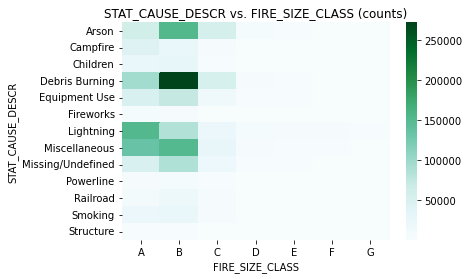

In [18]:
ax = sns.heatmap(my_contingency_table, cmap="BuGn")
ax.set_title("STAT_CAUSE_DESCR vs. FIRE_SIZE_CLASS (counts)")

Text(0.5, 1.0, 'STAT_CAUSE_DESCR vs. FIRE_SIZE_CLASS (normalized)')

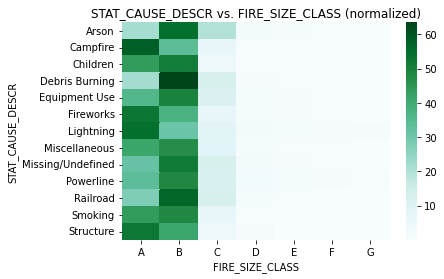

In [19]:
c1 = pd.crosstab(index=df["STAT_CAUSE_DESCR"], columns=df["FIRE_SIZE_CLASS"], normalize="index")*100
ax = sns.heatmap(c1, cmap="BuGn")
ax.set_title("STAT_CAUSE_DESCR vs. FIRE_SIZE_CLASS (normalized)")

In [20]:
chi2_contingency(my_contingency_table)

(175048.45582796063,
 0.0,
 72,
 array([[9.98198250e+04, 1.40599305e+05, 3.29396038e+04, 4.25475682e+03,
         2.11143823e+03, 1.16535465e+03, 5.64716554e+02],
        [2.70031858e+04, 3.80348208e+04, 8.91079744e+03, 1.15099369e+03,
         5.71184719e+02, 3.15250884e+02, 1.52766708e+02],
        [2.16932697e+04, 3.05556401e+04, 7.15857506e+03, 9.24661884e+02,
         4.58866753e+02, 2.53259838e+02, 1.22726608e+02],
        [1.52157538e+05, 2.14318590e+05, 5.02105570e+04, 6.48561869e+03,
         3.21851138e+03, 1.77637553e+03, 8.60809770e+02],
        [5.23515447e+04, 7.37387668e+04, 1.72755176e+04, 2.23145144e+03,
         1.10736572e+03, 6.11182358e+02, 2.96171466e+02],
        [4.07854892e+03, 5.74476207e+03, 1.34588280e+03, 1.73845565e+02,
         8.62714807e+01, 4.76153505e+01, 2.30738142e+01],
        [9.87604662e+04, 1.39107165e+05, 3.25900254e+04, 4.20960232e+03,
         2.08903015e+03, 1.15298708e+03, 5.58723382e+02],
        [1.14839525e+05, 1.61755016e+05, 3.78959635

In [21]:
chi2_contingency(my_contingency_table)[1]

0.0

#### In other words, the distributions of  STAT_CAUSE_DESCR and FIRE_SIZE_CLASS are not independent.

#### We can thus reject the null hypothesis and conclude that STAT_CAUSE_DESCR and FIRE_SIZE_CLASS are not independent

### Lets how its works for Months and days of week --

In [24]:
df["date_reformatted"] = pd.to_datetime(df["DISCOVERY_DATE"]) # This line might take several seconds to run
df["day_of_week"] = df["date_reformatted"].dt.day_name()
df["day_of_week"].head()

0    Wednesday
1    Wednesday
2       Monday
3       Monday
4       Monday
Name: day_of_week, dtype: object

In [26]:
c1 = pd.crosstab(df["STAT_CAUSE_DESCR"], df['day_of_week'])
c1

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
STAT_CAUSE_DESCR,,,,,,,
Arson,38116,40603,43477,44998,37589,38421,38251
Campfire,8868,11264,14979,16157,7990,8755,8126
Children,7910,8581,10724,10654,7647,7980,7671
Debris Burning,58526,62220,74337,57903,57789,59662,58591
Equipment Use,20962,22194,21185,18200,21408,21881,21782
Fireworks,1741,1529,1986,1753,1499,1381,1611
Lightning,40598,39331,38772,38306,40557,39522,41382
Miscellaneous,44282,46908,50744,49692,43698,44916,43565
Missing/Undefined,22617,24017,26410,24350,22841,23493,22995


Text(0.5, 1.0, 'STAT_CAUSE_DESCR vs. Day of Week')

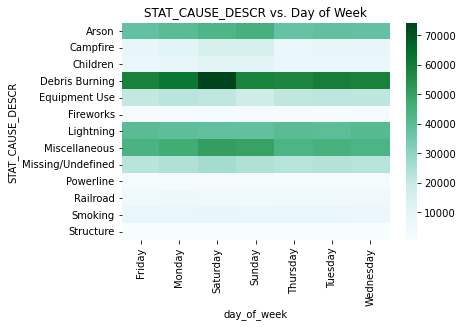

In [27]:
ax = sns.heatmap(c1, cmap="BuGn")
ax.set_title("STAT_CAUSE_DESCR vs. Day of Week")

In [28]:
chi2_contingency(c1)

(9727.581810122814,
 0.0,
 72,
 array([[38631.5215811 , 40777.08527146, 44600.48425788, 41426.3671193 ,
         38299.0976567 , 39031.44806737, 38688.99604619],
        [10450.57086093, 11030.98717551, 12065.29026278, 11206.63042439,
         10360.64378491, 10558.75868043, 10466.11881104],
        [ 8395.56689542,  8861.84993978,  9692.76730064,  9002.95463782,
          8323.32311157,  8482.48062368,  8408.0574911 ],
        [58886.87158123, 62157.40114706, 67985.49167786, 63147.11564001,
         58380.15053723, 59496.4882537 , 58974.4811629 ],
        [20260.70300271, 21385.96617964, 23391.18751585, 21726.48879293,
         20086.35982058, 20470.448605  , 20290.84608328],
        [ 1578.44947925,  1666.11529595,  1822.33596477,  1692.64437254,
          1564.86693451,  1594.7901184 ,  1580.79783458],
        [38221.53648592, 40344.32993329, 44127.15229903, 40986.72114185,
         37892.64047988, 38617.21866879, 38278.40099124],
        [44444.33335904, 46912.73594829, 51311.43452

In [31]:
df["Month"] = df["date_reformatted"].dt.strftime('%b')
df["Month"].head()

0    Feb
1    May
2    May
3    Jun
4    Jun
Name: Month, dtype: object

In [32]:
c2 = pd.crosstab(df["STAT_CAUSE_DESCR"], df["Month"])
c2

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
STAT_CAUSE_DESCR,,,,,,,,,,,,
Arson,46964,16230,10868,28172,16411,17687,15006,48580,23877,21662,19170,16828
Campfire,7800,9855,1725,3655,2504,10456,7265,6108,7919,4153,6580,8119
Children,11835,4358,2010,4299,2978,6257,5122,7894,7000,2991,3067,3356
Debris Burning,71234,19690,18905,52495,32816,19306,21519,84379,34890,25387,26446,21961
Equipment Use,14433,17521,4564,8459,6840,19506,17185,12050,15234,7399,10866,13555
Fireworks,449,461,90,117,183,6446,2274,281,354,373,219,253
Lightning,6046,86104,419,666,604,90665,42997,2369,16684,1032,4401,26481
Miscellaneous,43738,30895,11035,21152,17803,39063,29958,32858,33521,18437,20386,24959
Missing/Undefined,18925,14209,5661,21460,10263,18094,13338,28963,12123,6761,7740,9186


Text(0.5, 1.0, 'STAT_CAUSE_DESCR vs. Month')

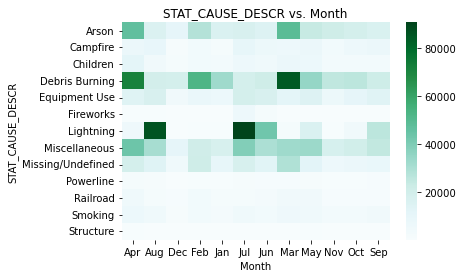

In [34]:
ax = sns.heatmap(c2, cmap="BuGn")
ax.set_title("STAT_CAUSE_DESCR vs. Month")

In [35]:
chi2_contingency(c2)

(513088.78550817684,
 0.0,
 132,
 array([[35358.62020564, 31218.51296887,  8803.62125591, 22322.54341878,
         14434.17308485, 35507.54492639, 24462.56920496, 35320.30389558,
         24531.11947843, 14014.93877046, 15714.47666402, 19766.57612612],
        [ 9565.18798329,  8445.20921261,  2381.54915992,  6038.67805995,
          3904.72190761,  9605.47498943,  6617.59626475,  9554.82268322,
          6636.14043441,  3791.31094862,  4251.06869205,  5347.23966413],
        [ 7684.28602128,  6784.54027382,  1913.24048733,  4851.23026166,
          3136.89600498,  7716.65097622,  5316.30978508,  7675.95895749,
          5331.20742263,  3045.78621724,  3415.13703472,  4295.75655755],
        [53897.91657489, 47587.06074508, 13419.55204271, 34026.74018182,
         22002.32509725, 54124.9257774 , 37288.82819941, 53839.51018711,
         37393.32087755, 21363.27708093, 23953.91978899, 30130.62344686],
        [18544.19586007, 16372.87359031,  4617.15066646, 11707.28990117,
          7570

In [37]:
df.describe()

,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,997827.000000,907912.000000,1.880465e+06
mean,2.003710e+03,5.979037e+00,3.678121e+01,-9.570494e+01,7.452016e+01,1453.014326,1534.832080,1.059658e+01
std,6.663099e+00,3.483860e+00,6.139031e+00,1.671694e+01,2.497598e+03,405.960963,432.737694,4.404662e+00
min,1.992000e+03,1.000000e+00,1.793972e+01,-1.788026e+02,1.000000e-05,0.000000,0.000000,0.000000e+00
25%,1.998000e+03,3.000000e+00,3.281860e+01,-1.103635e+02,1.000000e-01,1240.000000,1310.000000,8.000000e+00
50%,2.004000e+03,5.000000e+00,3.545250e+01,-9.204304e+01,1.000000e+00,1457.000000,1600.000000,1.400000e+01
75%,2.009000e+03,9.000000e+00,4.082720e+01,-8.229760e+01,3.300000e+00,1708.000000,1810.000000,1.400000e+01
max,2.015000e+03,1.300000e+01,7.033060e+01,-6.525694e+01,6.069450e+05,2359.000000,2359.000000,1.500000e+01


In [38]:
df.corr()

,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,OWNER_CODE
FIRE_YEAR,1.000000,0.057157,0.000407,0.015863,0.007048,0.030543,0.019465,-0.025825
STAT_CAUSE_CODE,0.057157,1.000000,-0.155831,0.182501,-0.021364,0.024374,-0.025593,0.295973
LATITUDE,0.000407,-0.155831,1.000000,-0.354727,0.038860,0.021728,-0.012641,-0.304302
LONGITUDE,0.015863,0.182501,-0.354727,1.000000,-0.039731,0.063089,0.024545,0.395288
FIRE_SIZE,0.007048,-0.021364,0.038860,-0.039731,1.000000,0.000982,-0.001539,-0.029635
DISCOVERY_TIME,0.030543,0.024374,0.021728,0.063089,0.000982,1.000000,0.549620,0.014043
CONT_TIME,0.019465,-0.025593,-0.012641,0.024545,-0.001539,0.549620,1.000000,-0.013321
OWNER_CODE,-0.025825,0.295973,-0.304302,0.395288,-0.029635,0.014043,-0.013321,1.000000


Text(0.5, 1.0, 'correlation matrix')

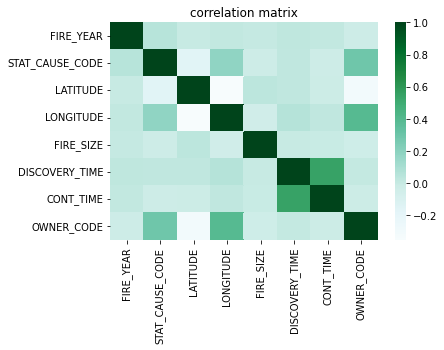

In [39]:
ax = sns.heatmap(df.corr(), cmap="BuGn")
ax.set_title("correlation matrix")